In [ ]:
# 구글 드라이브의 폴더와 구글 코랩 폴더 연결
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# 현재 경로 확인
!pwd

/content


In [ ]:
# drive/My Drive/Colab Notebooks 경로로 변경
%cd drive/My\ Drive/Colab\ Notebooks\

/content/drive/My Drive/Colab Notebooks


In [ ]:
!pwd

/content/drive/My Drive/Colab Notebooks


# Numpy

## Numpy를 사용하는 이유

```python
1. Vectorization 연산을 지원한다  
  - 동시에 여러개의 데이터를 처리해야 하는 것에 목적이 있기 때문에 사용한다  
2. 데이터 구조가 효율적이다 
  - 데이터가 적을 때는 변환 리소스가 발생하기 때문에 더 느릴 수도 있으나 일반적으로 빅 데이터를 다루기 때문에 더 빠르고 효율적이다 
3. 호환성이 좋다 
  - numpy는 기본적으로 cpu연산을 지원하고 gpu연산을 지원하는 tensorflow나 pytorch가 있는데도 불구하고 사용하는 이유는 
    tensorflow나 pytorch는 회사에 의존적이고 numpy는 tensorflow나 pytorch에 호환되기 때문에 사용한다 
4. 전문가 입장에서 볼때 쉽고 편하다 
```

## Numpy 속도가 빠른 이유

```python
1. C나 Fortran으로 만들어져 속도가 빠르다
2. Array기반으로 처리하기 때문에 속도가 빠르다
3. 데이터를 1열로 저장해, 효율적인 자료구조 형태를 갖기 때문에 빠르다
4. Homogeneous한 Type만을 저장하기 때문에 타입 체크 비용이 들지 않아 빠르다
5. 데이터를 메모리에 한번에 올려 처리하기 때문에 속도가 빠르다
6. 데이터 구조가 Structured array방식이기 때문에 데이터 접근이 빠르다
```

## Array

```
Homogenous, Sequence data type를 array라고 한다 => matrix(행렬)과 유사하다 

※ 이미지도 array로 이루어져 있기 때문에 array처리를 할 수 있으면 이미지 처리도 가능하다 
```

In [1]:
import numpy as np 

In [2]:
a = np.array([1,2,'3'])

In [3]:
a # array 데이터 구조이기 때문에 homogenous하게 유지해야한다  / numpy에서는 자동으로 가장 큰 데이터 타입으로 변환한다 

array(['1', '2', '3'], dtype='<U21')

In [4]:
import tensorflow as tf 

In [5]:
b = tf.constant([1,2,'3']) # tensorflow에서는 sequence 타입에 해당하는 값으로 이루어져 있지 않으면 ValueError가 발생한다 

ValueError: ignored

In [6]:
import torch

In [7]:
c = torch.Tensor([1,2,'3']) # torch에서는 sequence 타입에 해당하는 값으로 이루어져 있지 않으면 ValueError가 발생한다 

TypeError: ignored

## Coercion

```python
정수와 부동소수는 같은 데이터 타입이 아닌데도 불구하고 왜 numpy array나 tensorflow의 tensor에 같이 들어갈 수 있는가?

=> python은 coercion 규칙이 적용된다. 즉 같은 숫자형은 내부적으로 자동 형변환을 해준다. 
```

In [19]:
import numpy as np
import tensorflow as tf 

In [21]:
np.array([1,2,3,3.123132,434.22])

array([  1.      ,   2.      ,   3.      ,   3.123132, 434.22    ])

In [22]:
tf.constant([1,2,3,3.22,3.14,22.22,10])

<tf.Tensor: shape=(7,), dtype=float32, numpy=array([ 1.  ,  2.  ,  3.  ,  3.22,  3.14, 22.22, 10.  ], dtype=float32)>

## vectorization

```python
Vectorization은 loop 없이 여러개의 값을 동시에 연산해주는 방식이다
Python array연산과 달리 numpy array 연산은 지원하는 연산이 다르다 (numpy는 vectorization) 
numpy는 'elementwise'식으로 연산을 한다 (원소끼리 연산을 한다) 
벡터 계산은 병렬 계산이 가능하기 때문에, Multi Core 활용 가능하다(Multi cpu연산 가능)

Tensor(immutable)는 GPU를 사용하여 vectorization이고 
Numpy(mutable)는 CPU를 사용하여 vectorization을 지원한다(Third party로 gpu를 지원하는 CuPy가 있긴하다) 
```

```python
※ GPU를 지원하는 Numpy 즉, CuPy도 최근에 개발되었다
  Loop를 이용하고 복잡한 elementwise연산이 아닌 다른 형태의 연산을 하는 알고리즘이 아직 많이 있기 때문에 
  Cupy가 있다고 하더라도 Numpy를 꼭 할줄 알아야 한다  
  대표적으로 scikit learn에서는 gpu를 지원하지 않고 gpu를 사용하지 않는 머신러닝 알고리즘들도 있다
 
  Cupy: https://exmemory.tistory.com/42
```

In [8]:
import numpy as np

In [9]:
a = np.array([1,2,3])
b = np.array([3,4,5])

In [10]:
a + b

array([4, 6, 8])

|  not vectorized |   vectorized   |
|---------------|---------------|
|    요소 하나하나 순회하며 연산 | cpu가 n개이면 동시에 n개 연산이 병렬연산)  |

|수학적 관점|Tensor 관점|
|-----------------|-----------------|
|1차: vector|1차: vector|
|2차: matrix|2차: matrix|
|3차: Tensor|3차: cube|
|4차: Tensor|4차: vector of cubes|
|5차: Tensor|5차: matrix of cubes|

## 데이터 구조 

## ndarray

```python
'ndarray'란 n차원의 dimension을 지원하는 array이다 
 
파이썬은 1열로되어 있지 않고 메모리가 흩어져 저장되어 있다
따라서 데이터 타입체크, 연속적이지 않아서 찾아가는데 시간이걸리고 위치가 계속 변해서 cache기법을 쓸수 없다(linked list)
추가 삭제는 하지만 속도가 느리다    
그래서 빅 데이터 처리를 빠르게 하기 위해서는 파이썬 array형태의 데이터 구조를 그대로 쓸수가 없다 
 
'ndarray 특징'
1. Numpy는 내부적으로 1차원 형태로 데이터를 저장하고 연속적이게 저장한다
2. 1차원 형태로 저장은 되어 있지만 stride개념을 추가하여 데이터의 형태를 알 수 있도록 구조화 되어 있다  
3. homogeneus한 데이터 타입으로 구성되어 있어 ndarray안의 모든 데이터 타입을 확인 할 필요가 없다 
4. Indexing이 가능하고 변화시킬수 있게 구조를 만들어 놓았다
5. c코드 형태로 구현되어 있다  
6. Numpy는 효율적인 자료구조로 되어 있다 
7. ndarray의 요소는 직사각형 형태를 띄어야 한다 
- ex) np.array([[1,2],[1]]) => X np.array([[1,2],[3,4]]) => O
```

### ndarray vs array

In [49]:
import numpy as np

In [50]:
np.array([1,2,3]) # 여기서 array는 factory method 쉽게 만들도록 도와주는 함수 

array([1, 2, 3])

In [51]:
a = np.array([1,2,3])

In [52]:
type(a) # ndarray는 Numpy의 클래스 이름 

numpy.ndarray

In [53]:
b = np.ndarray([1,2,3]) # ndarray클래스를 활용한 인스턴스화 방식 

In [54]:
type(b)

numpy.ndarray

In [56]:
a == b # 클래스로 만드는 방식과 메소드로 만드는 방식의 결과는 다르다 

array([[[False, False, False],
        [False, False, False]]])

### ndarray 타입 데이터가 array([...]) 형태로 출력되는 이유

In [11]:
class Ndarray():
    def __repr__(self):  # array로 출력되는 것은 repr에 정의 되어 있기 때문이다 
        return 'array'
    
    def __str__(self):
        return 'data'

In [12]:
nd = Ndarray()

In [13]:
nd

array

In [14]:
print(nd)

data


<hr>

In [25]:
x = tf.constant([1,2,3])

In [29]:
x

<tf.Tensor: shape=(3,), dtype=int32, numpy=array([1, 2, 3], dtype=int32)>

In [26]:
with tf.GradientTape() as t:
  y = x*x

In [27]:
t.gradient(y,x)

In [28]:
np.ScalarType

(int,
 float,
 complex,
 int,
 bool,
 bytes,
 str,
 memoryview,
 numpy.object_,
 numpy.datetime64,
 numpy.ulonglong,
 numpy.longlong,
 numpy.void,
 numpy.complex256,
 numpy.float128,
 numpy.uint64,
 numpy.int64,
 numpy.str_,
 numpy.complex128,
 numpy.float64,
 numpy.uint32,
 numpy.int32,
 numpy.bytes_,
 numpy.complex64,
 numpy.float32,
 numpy.uint16,
 numpy.int16,
 numpy.bool_,
 numpy.timedelta64,
 numpy.float16,
 numpy.uint8,
 numpy.int8)

In [ ]:
# Bigdata에서는 float64 타입을 보통 쓴다 / 하지만 float32가 기본이다 왜냐하면 gpu/cpu연산이 32bit에 최적화 되어 있다 

In [30]:
import pandas as pd
import seaborn as sns

In [31]:
data = sns.load_dataset('tips')

In [32]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.3 KB


## ndarray Indexing의 5가지 방법

```python
1. Comma
2. Boolean indexing # 조건에 의해 뽑는다 
3. Fancy indexing # 재조합해서 뽑아 낼수 있다  
4. Extended fancy indexing
5. Ellipse indexing (...)
```

### Comma

In [64]:
a = np.arange(24).reshape(6,4)

In [66]:
a

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15],
       [16, 17, 18, 19],
       [20, 21, 22, 23]])

In [65]:
a[1,1]

5

In [68]:
a = np.arange(24).reshape(2,3,4)

In [59]:
a

array([[[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11]],

       [[12, 13, 14, 15],
        [16, 17, 18, 19],
        [20, 21, 22, 23]]])

In [69]:
a[0,1,:]

array([4, 5, 6, 7])

### Boolean Indesing

In [74]:
a[a > 1]

array([2, 3])

In [75]:
a[(a>1)|(a<4)]

array([1, 2, 3])

### Fancy Indexing

In [79]:
a = np.arange(12).reshape(3,4)

In [80]:
a[[1,2]] ## [[행, 열]]

array([[ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [81]:
a[[2,1]]

array([[ 8,  9, 10, 11],
       [ 4,  5,  6,  7]])

In [85]:
a[2]

array([ 8,  9, 10, 11])

In [82]:
a[[2]] # 괄호를 하나 더쓰면 뽑히는 차원이 다르다 

array([[ 8,  9, 10, 11]])

In [102]:
import pandas as pd
import seaborn as sns

In [103]:
data = sns.load_dataset('iris')

In [105]:
data.info

<bound method DataFrame.info of      sepal_length  sepal_width  petal_length  petal_width    species
0             5.1          3.5           1.4          0.2     setosa
1             4.9          3.0           1.4          0.2     setosa
2             4.7          3.2           1.3          0.2     setosa
3             4.6          3.1           1.5          0.2     setosa
4             5.0          3.6           1.4          0.2     setosa
..            ...          ...           ...          ...        ...
145           6.7          3.0           5.2          2.3  virginica
146           6.3          2.5           5.0          1.9  virginica
147           6.5          3.0           5.2          2.0  virginica
148           6.2          3.4           5.4          2.3  virginica
149           5.9          3.0           5.1          1.8  virginica

[150 rows x 5 columns]>

In [107]:
data[['sepal_length']]

,sepal_length
0,5.1
1,4.9
2,4.7
3,4.6
4,5.0
...,...
145,6.7
146,6.3
147,6.5
148,6.2


### Extended fancy indexing

In [94]:
a = np.array([[0,1,2],[3,4,5]])

In [95]:
a[[0,1],[1,2]]

array([1, 5])

### Ellipse(...)

In [98]:
a

array([[0, 1, 2],
       [3, 4, 5]])

In [99]:
a[0]

array([0, 1, 2])

In [100]:
a[0,:]

array([0, 1, 2])

In [101]:
a[0,...] # 하나 이상의 :을 대체 한다 

array([0, 1, 2])

In [130]:
a = np.arange(36).reshape(3,3,4)

In [131]:
a

array([[[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11]],

       [[12, 13, 14, 15],
        [16, 17, 18, 19],
        [20, 21, 22, 23]],

       [[24, 25, 26, 27],
        [28, 29, 30, 31],
        [32, 33, 34, 35]]])

In [134]:
a[...,1]

array([[ 1,  5,  9],
       [13, 17, 21],
       [25, 29, 33]])

In [136]:
a[0,...]

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [137]:
import tensorflow as tf 

In [138]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [139]:
X_train # 여기서 ...은 줄임표 (생략)

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [140]:
X_train.shape

(60000, 28, 28)

In [149]:
(X_train[0] == X_train[0,:,:]).all()

True

In [152]:
(X_train[0,...] == X_train[0,:,:]).all()

True

In [150]:
X_train[:,:,-1]

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [151]:
X_train[...,-1]

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [153]:
X_train[10000:50000,:14,:14]

array([[[  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0],
        ...,
        [  0,   0,   0, ...,  14, 101, 223],
        [  0,   0,   0, ..., 239, 253, 253],
        [  0,   0,   0, ..., 250, 253, 253]],

       [[  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0],
        ...,
        [  0,   0,   0, ...,   0,  97, 252],
        [  0,   0,   0, ...,   0, 148, 252],
        [  0,   0,   0, ...,   0, 217, 252]],

       [[  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0],
        ...,
        [  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0]],

       ...,

       [[  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0

In [154]:
a = np.array([1,2,3])
b = np.array([[1,2,],[3,4]])

In [156]:
a

array([1, 2, 3])

In [155]:
a[:,None] # None을 추가함으로써 axis가 추가 되었다 

array([[1],
       [2],
       [3]])

In [157]:
a[None,:]

array([[1, 2, 3]])

In [158]:
a[np.newaxis,:]

array([[1, 2, 3]])

In [159]:
np.newaxis is None

True

## ※ Copy

```python
copy는 두 가지 방법이 있다 
1. shallow copy # 데이터가 mutable일 때 shallow copy를 하면 원본까지 변형된다 
- data[:]  # :은 복사하기 때문에 주소가 달라진다 
- data.copy
2. deep copy # 원본과 동일하게 복제 / 주소가 다르다 
- copy.deepcopy(data)
```

In [109]:
a = [1,2,3]
b = a # memory 공유 
b[0] = 100
a[0]

100

In [110]:
c = [1,2,3]
d = c[:] # d = c.copy()
d[0] = 100
c[0]

1

In [112]:
# shallow copy 
e = [[1,2,3],[4,5,6]]
f = e[:]
f[0][0] = 100 
e[0][0]   

100

In [117]:
import copy 

In [118]:
e = [[1,2,3],[4,5,6]]
f = copy.deepcopy(e)
f[0][0] = 100
e[0][0]

1

In [119]:
id(e) == id(f)

False

In [120]:
import numpy as np

In [124]:
e = np.array([[1,2,3],[4,5,6]])
f = e.copy()  # numpy에서는 copy가 deepcopy다 
f[0][0] = 100
e[0][0]

1

In [126]:
e = np.array([[1,2,3],[4,5,6]])
f = e[:] # numpy에서는 :가 shallow copy다  
f[0][0] = 100
e[0][0]

100

In [129]:
e = np.array([1,2,3])
f = e.copy() # numpy에서는 copy가 deepcopy다   
f[0] = 100
e[0]

1

In [128]:
e = np.array([1,2,3])
f = e[:] # numpy에서는 :가 shallow copy다  
f[0] = 100
e[0]

100

## Image data (array 관점에서) 

In [203]:
import tensorflow as tf 
import matplotlib.pyplot as plt

In [204]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()

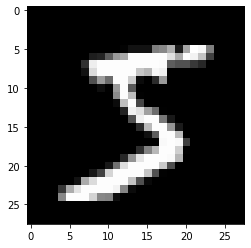

In [186]:
plt.imshow(X_train[0], cmap='gray')

In [187]:
X_train[0][0,0]

0

In [188]:
X_train[0].shape # 2차원으로 구성되어 있기 때문에 흑/백만 표현 가능하다  / 만약 데이터가 3차원 이었다면 RGB처럼 색을 표현할 수 있다 

(28, 28)

In [189]:
X_train[0] # 숫자는 색깔 정보 0 => 검정색 255=> 흰색 (RGB) 

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [ ]:
X_train[0].reshape(28,28,1)

In [224]:
X_train[0][...,np.newaxis].shape

(28, 28, 1)

In [172]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.cifar10.load_data()

170508288/170498071 [==============================] - 2s 0us/step


In [175]:
X_train.shape # 32 x 32가 3장 겹쳐 있는 데이터가 5만장이 있다 

(50000, 32, 32, 3)

In [174]:
X_train[0].shape # 3차원 데이터이기 때문에 RGB를 표현 할 수 있다 

(32, 32, 3)

In [178]:
X_train[-1][0,0]

array([229, 229, 239], dtype=uint8)

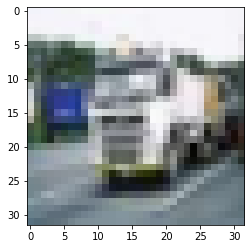

In [180]:
plt.imshow(X_train[1000])

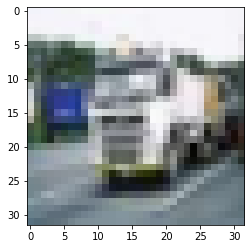

In [182]:
plt.imshow(X_train[1000,...])

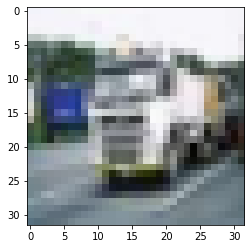

In [183]:
plt.imshow(X_train[1000,:,:])